In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import cv2 as cv
import numpy as np
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [93]:
fvqa_images_path = "F:\\NUST\\thesis_local\\Practice\\FVQA\\images"
def show_fvqa_image(image_name):
    print(image_name)
    plt.imshow(plt.imread(os.path.join(fvqa_images_path, image_name)))

In [5]:
all_facts_file_path = 'fvqa_data//all_fact_triples_release.json'
all_facts_data_df = pd.read_json(all_facts_file_path, orient ='index')
all_facts_data_df.head()

,KB,e1_label,e2_label,uri,surface,dataset,sources,r,context,score,e1,e2,isnegated
conceptnet/e/a9c086711e083ba3503a06846848e30999b4d3f7,conceptnet,monkey meat,meat,"/a/[/r/RelatedTo/,/c/en/monkey_meat/n/,/c/en/m...",[[monkey meat]] is related to [[meat]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/monkey_meat/n,/c/en/meat,NaN
conceptnet/e/acfa62a6eab1fd51f6bafca20f46277c37f1bcb9,conceptnet,neuroimaging,image,"/a/[/r/EtymologicallyDerivedFrom/,/c/en/neuroi...","The word ""[[neuroimaging]]"" etymologically com...",/d/wiktionary/en/en,"/and/[/s/rule/etymology_section/,/s/web/en.wik...",/r/EtymologicallyDerivedFrom,/ctx/all,1.0,/c/en/neuroimaging,/c/en/image,NaN
conceptnet/e/f00e325c34450297a00026be9a99b63e339e5539,conceptnet,jamaica,island,"/a/[/r/RelatedTo/,/c/en/jamaica/n/,/c/en/island/]",[[Jamaica]] is related to [[island]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/jamaica/n,/c/en/island,NaN
conceptnet/e/9e911a1a354fde0b691a62681e10ac3c7cf09407,conceptnet,train,arrive at station,"/a/[/r/CapableOf/,/c/en/train/,/c/en/arrive_at...",[[a train]] can [[arrive at a station]],/d/conceptnet/4/en,/and/[/s/activity/omcs/omcs1_possibly_free_tex...,/r/CapableOf,/ctx/all,1.0,/c/en/train,/c/en/arrive_at_station,NaN
conceptnet/e/a86ca74c722e436c1fdb7084daa45ff03a93c1ab,conceptnet,aletschhorn,mountain,"/a/[/r/RelatedTo/,/c/en/aletschhorn/n/,/c/en/m...",[[Aletschhorn]] is related to [[mountain]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/aletschhorn/n,/c/en/mountain,NaN


In [6]:
question_file_path = 'fvqa_data//all_qs_dict_release.json'
questions_data_df = pd.read_json(question_file_path, orient ='index')
questions_data_df['fact'] = questions_data_df['fact'].apply(lambda x: str(x[0]))
questions_data_df.head()

,fact_surface,ans_source,answer,question,img_file,visual_concept,kb_source,fact,question_id
270,You are likely to find [[a trumpet]] in [[a ja...,image,trumpet,Which object can be found in a jazz club,ILSVRC2012_test_00050748.JPEG,obj,conceptnet,conceptnet/e/f768f157e4446dd594536f8ef02681515...,270
271,[[lipstick]] belongs to the category of [[Cosm...,image,lipstick,Tell me the name of the cosmetics shown in thi...,ILSVRC2012_test_00000444.JPEG,obj,dbpedia,dbpedia/8657,271
272,[[Lipstick]] is for [[coloring the lips]],kb,coloring the lips,What is the object shown in this image used for,ILSVRC2012_test_00000444.JPEG,obj,conceptnet,conceptnet/e/18b413dee0ebe3cadef337f364baa6164...,272
273,You are likely to find [[lipstick]] in [[a mak...,kb,a makeup cabinet,Where can you find the object in this image,ILSVRC2012_test_00000444.JPEG,obj,conceptnet,conceptnet/e/c8399f11b843cb0fa84dbfe8659542126...,273
274,[[A kite]] has [[a tail]],image,kite,Which object in this image has a tail,COCO_val2014_000000005599.jpg,obj,conceptnet,conceptnet/e/1e9f66df12d446019dc02db7fe054b87c...,274


In [7]:
# join question with fact dataframe to create join question with facts dataframe
merged_ques_facts_df = pd.merge(questions_data_df, all_facts_data_df , right_index=True, left_on='fact')

In [8]:
merged_ques_facts_df.head()

,fact_surface,ans_source,answer,question,img_file,visual_concept,kb_source,fact,question_id,KB,e1_label,e2_label,uri,surface,dataset,sources,r,context,score,e1,e2,isnegated
270,You are likely to find [[a trumpet]] in [[a ja...,image,trumpet,Which object can be found in a jazz club,ILSVRC2012_test_00050748.JPEG,obj,conceptnet,conceptnet/e/f768f157e4446dd594536f8ef02681515...,270,conceptnet,trumpet,jazz club,"/a/[/r/AtLocation/,/c/en/trumpet/,/c/en/jazz_c...",You are likely to find [[a trumpet]] in [[a ja...,/d/conceptnet/4/en,"/and/[/s/activity/omcs/globalmind/,/s/contribu...",/r/AtLocation,/ctx/all,1.0,/c/en/trumpet,/c/en/jazz_club,NaN
271,[[lipstick]] belongs to the category of [[Cosm...,image,lipstick,Tell me the name of the cosmetics shown in thi...,ILSVRC2012_test_00000444.JPEG,obj,dbpedia,dbpedia/8657,271,dbpedia,lipstick,Cosmetics,NaN,[[lipstick]] belongs to the category of [[Cosm...,NaN,NaN,dbpedia/transnbhd,NaN,1.0,http://dbpedia.org/resource/Lipstick,http://dbpedia.org/resource/Cosmetics,NaN
569,[[lipstick]] belongs to the category of [[Cosm...,image,lipstick,what object in this image is a cosmetic placed...,ILSVRC2012_test_00045533.JPEG,obj,dbpedia,dbpedia/8657,569,dbpedia,lipstick,Cosmetics,NaN,[[lipstick]] belongs to the category of [[Cosm...,NaN,NaN,dbpedia/transnbhd,NaN,1.0,http://dbpedia.org/resource/Lipstick,http://dbpedia.org/resource/Cosmetics,NaN
272,[[Lipstick]] is for [[coloring the lips]],kb,coloring the lips,What is the object shown in this image used for,ILSVRC2012_test_00000444.JPEG,obj,conceptnet,conceptnet/e/18b413dee0ebe3cadef337f364baa6164...,272,conceptnet,lipstick,color lip,"/a/[/r/UsedFor/,/c/en/lipstick/,/c/en/color_lip/]",[[Lipstick]] is for [[coloring the lips]],/d/conceptnet/4/en,/and/[/s/activity/omcs/omcs1_possibly_free_tex...,/r/UsedFor,/ctx/all,1.0,/c/en/lipstick,/c/en/color_lip,NaN
383,[[Lipstick]] is for [[coloring the lips]],image,lipstick,Which item in this image is used for colouring...,ILSVRC2012_test_00002289.JPEG,obj,conceptnet,conceptnet/e/18b413dee0ebe3cadef337f364baa6164...,383,conceptnet,lipstick,color lip,"/a/[/r/UsedFor/,/c/en/lipstick/,/c/en/color_lip/]",[[Lipstick]] is for [[coloring the lips]],/d/conceptnet/4/en,/and/[/s/activity/omcs/omcs1_possibly_free_tex...,/r/UsedFor,/ctx/all,1.0,/c/en/lipstick,/c/en/color_lip,NaN


### FVQA Dictionary

In [81]:
import re
from string import punctuation

import collections
import re
col_filter = ['answer', 'question']
filtered_df = merged_ques_facts_df.loc[:,col_filter]
list_of_words = [re.sub('[^a-zA-Z]+', '', y) for x in filtered_df.values.flatten() for y in str(x).lower().split() if y not in punctuation]


e1_labels = [y.lower() for y in all_facts_data_df['e1_label'].values]
e1_label_words = [y for x in e1_labels for y in str(x).lower().split() if y not in punctuation]

e2_labels = [y.lower() for y in all_facts_data_df['e2_label'].values]
e2_label_words = [y for x in e2_labels for y in str(x).lower().split() if y not in punctuation]

list_of_words.extend(e1_label_words)
list_of_words.extend(e2_label_words)

fvqa_count_words = collections.Counter(list_of_words)
fvqa_total_words = len(list_of_words)
fvqa_sorted_words = fvqa_count_words.most_common(fvqa_total_words)
fvqa_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(fvqa_sorted_words)}
fvqa_int_to_vocab = {i+1:w for i, (w,c) in enumerate(fvqa_sorted_words)}

file = open("generated_fvqa_data//fvqa_int_to_vocab.json", "w")
json.dump(fvqa_int_to_vocab, file)
file.close()

file = open("generated_fvqa_data//fvqa_vocab_to_int.json", "w")
json.dump(fvqa_vocab_to_int, file)
file.close()

file = open("fvqa_data//our_features//word_count.json", "w")
json.dump(fvqa_count_words, file)
file.close()

### FVQA Data Analysis

In [10]:
img_question_counts = merged_ques_facts_df['img_file'].value_counts()
print('total images having multiple questions = ', len(img_question_counts[img_question_counts > 1]))
print('total images having single question = ', len(img_question_counts[img_question_counts == 1]))
img_question_counts.name="Images with question counts"
img_question_counts

total images having multiple questions =  1362
total images having single question =  828


COCO_val2014_000000011567.jpg    45
ILSVRC2012_test_00002135.JPEG    34
ILSVRC2012_test_00034356.JPEG    27
ILSVRC2012_test_00040381.JPEG    25
COCO_val2014_000000009707.jpg    23
                                 ..
COCO_val2014_000000131557.jpg     1
COCO_val2014_000000102466.jpg     1
ILSVRC2012_test_00001757.JPEG     1
ILSVRC2012_test_00043594.JPEG     1
ILSVRC2012_test_00003426.JPEG     1
Name: Images with question counts, Length: 2190, dtype: int64

COCO_val2014_000000011567.jpg


,question,fact,question_id,answer
2688,what object in this image can be male or female?,conceptnet/e/18d46d251d098a08bce0a8ba75a3aace3...,2688,people
2689,what object in this image can smell things?,conceptnet/e/80ec77fe0bd79b1a23a9dc19f122ae858...,2689,person
2684,which object in this image is capable of doing...,conceptnet/e/f48f282f7d85e6f55c3391f15e03e8986...,2684,people
2685,what object in this image can dance to music?,conceptnet/e/f8dc32f1e2badb1e65f93097b4609fde5...,2685,people
2686,what object in this image can post a letter?,conceptnet/e/5f57a6c051703032a75d6cd1fb80d2e65...,2686,a person
2687,what object in this image can walk?,conceptnet/e/95cfb48444cbde268e1a03eec57d6b140...,2687,person
2680,which object in this image is capable of paint...,conceptnet/e/1be855f14cbaa60f529d30137a7675224...,2680,people
2681,which object in this image is capable of smell...,conceptnet/e/85b5556053e14e40ff3009e747672bd89...,2681,people
2682,which object in this image is capable of ownin...,conceptnet/e/2d4202908ae9bdc6d8229ebcab98e338d...,2682,a person
2683,what object in this image can loose weight?,conceptnet/e/a2171a2be5f200c06ea0adb098aa07a04...,2683,people


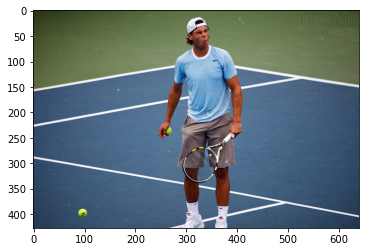

In [11]:
imgid_with_max_questions = img_question_counts.index[0]
show_fvqa_image(imgid_with_max_questions)
col = ['question','fact', 'question_id', 'answer']
questions_data_df[questions_data_df['img_file'] == imgid_with_max_questions][col]

### Visual Concepts Processing

In [12]:
# Load Visula Concept Classes

coco_classes = np.asarray(['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                           'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
                           'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
                           'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
                           'tie', 'suitcase', 'frisbee', 'skis','snowboard', 'sports ball', 'kite',
                           'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                           'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
                           'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                           'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
                           'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
                           'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
                           'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'])

imagenet_classes = np.asarray(['__background__', 'accordion', 'airplane', 'ant', 'antelope', 'apple', 'armadillo',
                    'artichoke', 'axe', 'baby bed', 'backpack', 'bagel', 'balance beam', 'banana', 'band aid', 'banjo', 'baseball',
                    'basketball', 'bathing cap', 'beaker', 'bear', 'bee', 'bell pepper', 'bench', 'bicycle', 'binder', 'bird',
                    'bookshelf', 'bow tie', 'bow', 'bowl', 'brassiere', 'burrito', 'bus', 'butterfly', 'camel', 'can opener',
                    'car', 'cart', 'cattle', 'cello', 'centipede', 'chain saw', 'chair', 'chime', 'cocktail shaker', 'coffee maker',
                    'computer keyboard', 'computer mouse', 'corkscrew', 'cream', 'croquet ball', 'crutch', 'cucumber',
                    'cup or mug', 'diaper', 'digital clock', 'dishwasher', 'dog', 'domestic cat', 'dragonfly', 'drum', 'dumbbell',
                    'electric fan', 'elephant', 'face powder', 'fig', 'filing cabinet', 'flower pot', 'flute', 'fox', 'french horn',
                    'frog', 'frying pan', 'giant panda', 'goldfish', 'golf ball', 'golfcart', 'guacamole', 'guitar', 'hair dryer',
                     'hair spray', 'hamburger', 'hammer', 'hamster', 'harmonica', 'harp', 'hat with a wide brim', 'head cabbage',
                     'helmet', 'hippopotamus', 'horizontal bar', 'horse', 'hotdog', 'iPod', 'isopod', 'jellyfish', 'koala bear',
                     'ladle', 'ladybug', 'lamp', 'laptop', 'lemon', 'lion', 'lipstick', 'lizard', 'lobster', 'maillot', 'maraca',
                     'microphone', 'microwave', 'milk can', 'miniskirt', 'monkey', 'motorcycle', 'mushroom', 'nail', 'neck brace',
                     'oboe', 'orange', 'otter', 'pencil box', 'pencil sharpener', 'perfume', 'person', 'piano', 'pineapple',
                     'ping-pong ball', 'pitcher', 'pizza', 'plastic bag', 'plate rack', 'pomegranate', 'popsicle', 'porcupine',
                     'power drill', 'pretzel', 'printer', 'puck', 'punching bag', 'purse', 'rabbit', 'racket', 'ray', 'red panda',
                     'refrigerator', 'remote control', 'rubber eraser', 'rugby ball', 'ruler', 'salt or pepper shaker', 'saxophone',
                     'scorpion', 'screwdriver', 'seal', 'sheep', 'ski', 'skunk', 'snail', 'snake', 'snowmobile', 'snowplow', 'soap dispenser',
                     'soccer ball', 'sofa', 'spatula', 'squirrel', 'starfish', 'stethoscope', 'stove', 'strainer', 'strawberry', 'stretcher',
                     'sunglasses', 'swimming trunks', 'swine', 'syringe', 'table', 'tape player', 'tennis ball', 'tick', 'tie', 'tiger',
                     'toaster', 'traffic light', 'train', 'trombone', 'trumpet', 'turtle', 'tv or monitor', 'unicycle', 'vacuum', 'violin',
                     'volleyball', 'waffle iron', 'washer', 'water bottle', 'watercraft', 'whale', 'wine bottle', 'zebra'])

places_365_classes = []

utils_path = "utils"

with open(os.path.join(utils_path, 'places365classes.txt')) as class_file:
    for line in class_file:
        places_365_classes.append(line.strip().split(' ')[0][3:])

hoi_file = open(os.path.join(utils_path, "hico_list_hoi.txt"))
next(hoi_file)
next(hoi_file)
hoi_dictionary = {}
hois = []

verb_dictionary = {}
verbs_list = []
for line in hoi_file:
    no_zeros = line.strip("0")
    line = no_zeros.split()
    hoi_dictionary[line[0]] = " ".join(line[1:])
    hois.append(" ".join(line[1:]))

verb_dictionary = {}
a_file = open(os.path.join(utils_path, "hico_list_vb.txt"))
next(a_file)
next(a_file)
for line in a_file:
    key, value = line.split()
    key = key.strip("0")
    verb_dictionary[key] = value
    verbs_list.append(value)

visual_concepts = []
visual_concepts.extend(coco_classes.tolist())
visual_concepts.extend(imagenet_classes.tolist())
visual_concepts.extend(places_365_classes)
visual_concepts.extend(hois)
print('Total visual_concepts length = ', len(visual_concepts))
visual_concepts = pd.Series(np.array(visual_concepts)).unique()
print('Unique visual_concepts length = ', len(visual_concepts))

visual_concepts_count_words = Counter(visual_concepts)
visual_concepts_total_words = len(visual_concepts)
visual_concepts_sorted_words = visual_concepts_count_words.most_common(visual_concepts_total_words)
visual_concepts_vocab_to_int = {w:i for i, (w,c) in enumerate(visual_concepts_sorted_words)}
visual_concepts_int_to_vocab = {i:w for i, (w,c) in enumerate(visual_concepts_sorted_words)}

Total visual_concepts length =  1247
Unique visual_concepts length =  1218


In [13]:
# Visula concept Processing
coco_index = []
coco_objects = []

imagenet_index = []
imagenet_objects = []

hoi_index = []
hoi_labels = []

places365_index = []
places365_labels = []

json_dir = 'fvqa_data//visual_concepts'

detected_visual_concepts_i = []
detected_visual_concepts = []

for index, row in merged_ques_facts_df.iterrows():
    img_name = row['img_file']
    ext = img_name.split('.')[-1:][0]
    json_file = img_name.replace(ext, 'json')
    f = open(os.path.join(json_dir, json_file))
    json_data = json.load(f)
    coco_i = json_data['coco-faster-rcnn']['index']
    coco_l = json_data['coco-faster-rcnn']['labels']
    imagenet_i = json_data['imagenet-faster-rcnn']['index']
    imagenet_l = json_data['imagenet-faster-rcnn']['labels']
    places365_i = np.array(json_data['places-365-detections']['index'])[0:5]
    places365_l = np.array(json_data['places-365-detections']['labels'])[0:5]
    hoi_i = []
    hoi_l = []

    coco_index.append(coco_i); coco_objects.append(coco_l)
    imagenet_index.append(imagenet_i); imagenet_objects.append(imagenet_l)
    places365_index.append(places365_i); places365_labels.append(places365_l)

    if len(json_data['results']) > 0:
        hoi_i = json_data['results']['hoi']['index']
        hoi_l = json_data['results']['hoi']['hois']
        hoi_index.append(hoi_i)
        hoi_labels.append(hoi_l)
    else:
        hoi_index.append([])
        hoi_labels.append([])
    single_visual_concepts = []

    single_visual_concepts.extend(coco_l)
    single_visual_concepts.extend(imagenet_l)
    single_visual_concepts.extend(places365_l.tolist())
    single_visual_concepts.extend(hoi_l)
    single_visual_concepts = pd.Series(np.array(single_visual_concepts)).unique()

    single_visual_concepts_i = [visual_concepts_vocab_to_int[x] for x in single_visual_concepts]

    detected_visual_concepts.append(single_visual_concepts)
    detected_visual_concepts_i.append(single_visual_concepts_i)

In [14]:
# merged_ques_facts_df['coco_index'] = coco_index
merged_ques_facts_df['coco_objects'] = coco_objects
# merged_ques_facts_df['imagenet_index'] = imagenet_index
merged_ques_facts_df['imagenet_objects'] = imagenet_objects
# merged_ques_facts_df['places365_index'] = places365_index
merged_ques_facts_df['places365_labels'] = places365_labels
# merged_ques_facts_df['hoi_index'] = hoi_index
merged_ques_facts_df['hoi_labels'] = hoi_labels
merged_ques_facts_df['detected_visual_concepts'] = detected_visual_concepts
# merged_ques_facts_df['detected_visual_concepts_i'] = detected_visual_concepts_i

# del coco_index, coco_objects, imagenet_index, imagenet_objects, places365_index, places365_labels, hoi_index, hoi_labels
# del detected_visual_concepts, detected_visual_concepts_i

In [15]:
from string import punctuation
def visual_concept_preprocessing(detected_visual_concepts):
    return [vc.replace('_', ' ').replace('/', ' ') for vc in detected_visual_concepts if vc not in punctuation]
merged_ques_facts_df['detected_visual_concepts'] = merged_ques_facts_df['detected_visual_concepts'].apply(lambda vc:visual_concept_preprocessing(vc))

In [16]:
merged_ques_facts_df['detected_visual_concepts']

270     [person, traffic light, umbrella, handbag, tie...
271     [cell phone, lipstick, chemistry lab, clean ro...
569     [person, bottle, knife, bowl, vase, face powde...
272     [cell phone, lipstick, chemistry lab, clean ro...
383     [bottle, cup, book, lipstick, beauty salon, co...
                              ...                        
5635    [person, umbrella, handbag, tennis racket, cru...
5636    [person, umbrella, handbag, tennis racket, cru...
5637    [person, umbrella, handbag, tennis racket, cru...
5630    [bird, turtle, desert sand, iceberg, science m...
5632    [person, umbrella, handbag, tennis racket, cru...
Name: detected_visual_concepts, Length: 5826, dtype: object

In [17]:
col_filter = ['question','img_file', 'answer', 'detected_visual_concepts']
merged_ques_facts_df.loc[:, col_filter].head(10)

,question,img_file,answer,detected_visual_concepts
270,Which object can be found in a jazz club,ILSVRC2012_test_00050748.JPEG,trumpet,"[person, traffic light, umbrella, handbag, tie..."
271,Tell me the name of the cosmetics shown in thi...,ILSVRC2012_test_00000444.JPEG,lipstick,"[cell phone, lipstick, chemistry lab, clean ro..."
569,what object in this image is a cosmetic placed...,ILSVRC2012_test_00045533.JPEG,lipstick,"[person, bottle, knife, bowl, vase, face powde..."
272,What is the object shown in this image used for,ILSVRC2012_test_00000444.JPEG,coloring the lips,"[cell phone, lipstick, chemistry lab, clean ro..."
383,Which item in this image is used for colouring...,ILSVRC2012_test_00002289.JPEG,lipstick,"[bottle, cup, book, lipstick, beauty salon, co..."
3756,Which item in this image is to color lips?,ILSVRC2012_test_00045533.JPEG,lipstick,"[person, bottle, knife, bowl, vase, face powde..."
273,Where can you find the object in this image,ILSVRC2012_test_00000444.JPEG,a makeup cabinet,"[cell phone, lipstick, chemistry lab, clean ro..."
274,Which object in this image has a tail,COCO_val2014_000000005599.jpg,kite,"[person, umbrella, sports ball, kite, coast, p..."
5221,What object has tail?,COCO_val2014_000000023200.jpg,Kite.,"[person, kite, surfboard, airplane, iceberg, o..."
275,what object in this image is commonly eaten fo...,COCO_val2014_000000015079.jpg,sandwich,"[knife, sandwich, dining table, hamburger, ice..."


In [18]:
common_classes = [x for x in coco_classes if x in imagenet_classes and places_365_classes]
len_coco = len(coco_classes)
len_imagenet = len(imagenet_classes)
print('total coco classes = ', len_coco)
print('total imagenet classes = ', len_imagenet)
print('total imagenet and coco = ', len_coco + len_imagenet)
print('common classes imagenet and coco = ', len(common_classes))

print('===============================')
print('Total Visual Concepts')
print('===============================')
print('different classes imagenet and coco = ', len_coco + len_imagenet - len(common_classes))
print('total places 365 classes = ', len(places_365_classes))
print('total hoi (human object interaction) classes = ', len(hois))

print('total Visual Concepts = ',  len_coco + len_imagenet - len(common_classes) + len(places_365_classes) + len(hois))

total coco classes =  81
total imagenet classes =  201
total imagenet and coco =  282
common classes imagenet and coco =  29
Total Visual Concepts
different classes imagenet and coco =  253
total places 365 classes =  365
total hoi (human object interaction) classes =  600
total Visual Concepts =  1218


### Loading GloVe 300d embeddings

In [78]:
embeddings_dict = {}
path_glove300d = "F:\\NUST\\thesis_local\\Practice\\straight-to-the-fact\\glove.6B"
with open(os.path.join(path_glove300d, "glove.6B.300d.txt"), 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [20]:
embeddings_dict['person']

array([-5.5598e-01,  2.7967e-02, -3.2289e-01, -7.5042e-02, -1.3179e-01,
        1.3271e-01, -1.5578e-01,  1.1468e-01, -5.5989e-02, -1.6266e+00,
        1.2912e-01, -2.0525e-01, -2.1620e-01, -8.7432e-02, -8.5335e-02,
        3.3107e-02, -2.2467e-01, -9.9248e-02, -2.1777e-01, -2.5671e-01,
        6.3234e-02,  5.0175e-01, -1.6002e-01,  3.0961e-01,  2.0912e-01,
       -2.9045e-01,  4.2019e-02, -2.2472e-02,  2.4542e-01, -7.5772e-02,
       -5.6552e-01,  6.2501e-01, -3.5209e-01, -6.0992e-01, -9.3654e-01,
        2.5625e-01,  2.1782e-01, -2.4591e-01, -5.3093e-01,  2.0034e-01,
        2.2471e-02,  7.3258e-02, -2.9808e-02,  8.2042e-02, -2.6838e-01,
        1.1861e-02,  5.9190e-01,  8.2740e-03, -7.7560e-02,  3.7252e-01,
        1.2574e-01,  5.6610e-02,  6.1548e-01,  1.9826e-01, -5.3163e-02,
        2.7715e-01,  1.5825e-01,  1.3941e-01,  3.5109e-01, -2.1844e-01,
        1.0418e-01,  8.9417e-02,  1.1362e-01,  2.5903e-01, -1.0444e-01,
       -3.0457e-01, -3.6033e-01, -2.2062e-01, -4.7356e-01,  4.80

In [28]:
from scipy import spatial
def calculate_cosine_distance(a, b):
    cosine_distance = float(spatial.distance.cosine(a, b))
    return cosine_distance
def calculate_cosine_similarity(a, b):
    cosine_similarity = 1 - calculate_cosine_distance(a, b)
    return cosine_similarity

### Similar Facts

In [28]:
from string import punctuation
def question_glove_embedding(question):
    question = ''.join([q for q in question if q not in punctuation])
    # print(question)
    question = question.split()
    question_words_emb = []
    for w in question:
        try:
            question_words_emb.append(embeddings_dict[w.lower()])
        except KeyError:
            question_words_emb.append(np.zeros(300))
    data = np.array(question_words_emb)
    question_glove_emb = np.average(data, axis=0)
    return question_glove_emb

def visual_concept_glove_embedding(vc_list):
    vc_list = [word for vc in vc_list for word in vc.split()]
    vc_words_emb = [0] * 300
    # print('all', vc_list)
    # print('exsist')
    for w in vc_list:
        if w in fvqa_vocab_to_int:
            # print(w.lower())
            try:
                vc_words_emb.append(embeddings_dict[w.lower()])
            except KeyError:
                vc_words_emb.append(np.zeros(300))
    data = np.array(vc_words_emb)
    visual_concepts_glove_emb = np.average(data, axis=0)
    return visual_concepts_glove_emb

In [29]:
def fact_glove_embeddings(fact):
    e1_labels = fact['e1_label']
    e1_labels = ''.join([label for label in e1_labels if label not in punctuation])
    fact_words = e1_labels.split()
    e2_labels = fact['e2_label']
    e2_labels = ''.join([label for label in e2_labels if label not in punctuation])
    fact_words.extend(e2_labels.split())
    fact_emb = []
    for w in fact_words:
        try:
            fact_emb.append(embeddings_dict[w.lower()])
        except KeyError:
            fact_emb.append(np.zeros(300))
    fact_emb = np.array(fact_emb)
    fact_emb = np.average(fact_emb, axis=0)
    return fact_emb

In [31]:
first_ques = merged_ques_facts_df.iloc[0]
most_similar_fact = all_facts_data_df.loc['conceptnet/e/bdb278197e7b379d787a9fb0fd24688a73a44da9']
supporting_similar_fact = all_facts_data_df.loc['conceptnet/e/f768f157e4446dd594536f8ef02681515586ba2d']
ques_emb = question_glove_embedding(first_ques['question'])
vc_emb = visual_concept_glove_embedding(first_ques['detected_visual_concepts'])
vc_ques_emb = np.average([ques_emb, vc_emb], axis=0)

most_similar_fact_emb = fact_glove_embeddings(most_similar_fact)
supporting_similar_fact_emb = fact_glove_embeddings(supporting_similar_fact)

most_similar_fact_similarity = calculate_cosine_similarity(vc_ques_emb, most_similar_fact_emb)
supporting_similar_fact_similarity = calculate_cosine_similarity(vc_ques_emb, supporting_similar_fact_emb)

print('top similar fact and its similarity:', most_similar_fact_similarity, most_similar_fact)
print('ground truth fact and its similarity:', supporting_similar_fact_similarity, supporting_similar_fact)

top similar fact and its similarity: 0.8627697229385376 KB                                                  conceptnet
e1_label     difference between bicycle and audience one be...
e2_label                                                 metal
uri          /a/[/r/MadeOf/,/c/en/difference_between_bicycl...
surface      [[difference between a bicycle and an audience...
dataset                                     /d/conceptnet/4/en
sources      /and/[/s/activity/omcs/globalmind/,/s/contribu...
r                                                    /r/MadeOf
context                                               /ctx/all
score                                                      1.0
e1           /c/en/difference_between_bicycle_and_audience_...
e2                                                 /c/en/metal
isnegated                                                  NaN
Name: conceptnet/e/bdb278197e7b379d787a9fb0fd24688a73a44da9, dtype: object
ground truth fact and its similarity: 0.5102825164

In [32]:
merged_ques_facts_df['question_glove_emb'] = merged_ques_facts_df['question'].apply(lambda q:question_glove_embedding(q))
merged_ques_facts_df['detected_visual_concepts_glove_emb'] = merged_ques_facts_df['detected_visual_concepts'].apply(lambda vc:visual_concept_glove_embedding(vc))
merged_ques_facts_df['vc_ques_avg_emb'] = merged_ques_facts_df.apply(lambda x: np.average([x['question_glove_emb'], x['detected_visual_concepts_glove_emb']], axis=0), axis=1)

In [33]:
col_filter = ['question_glove_emb', 'detected_visual_concepts_glove_emb', 'vc_ques_avg_emb']
merged_ques_facts_df[col_filter]

,question_glove_emb,detected_visual_concepts_glove_emb,vc_ques_avg_emb
270,"[-0.3192547, 0.26529467, -0.13019101, -0.16838...","[-0.011033769, 0.0069697397, -0.023061635, -0....","[-0.16514423, 0.13613221, -0.07662632, -0.0946..."
271,"[-0.070112996, 0.1646, -0.08106989, -0.3089736...","[-0.0054393103, 0.008085377, -0.0063661477, -0...","[-0.037776154, 0.086342685, -0.043718018, -0.1..."
569,"[-0.20552087, 0.15748252, -0.018667035, -0.174...","[-0.007785855, 0.017889425, -0.0054256804, -0....","[-0.10665336, 0.08768597, -0.012046358, -0.098..."
272,"[-0.26991102, 0.22777131, 0.03530276, -0.27782...","[-0.0054393103, 0.008085377, -0.0063661477, -0...","[-0.13767517, 0.11792834, 0.014468305, -0.1442..."
383,"[-0.21976165, 0.23105346, -0.0057196724, -0.23...","[-0.0030261187, 0.009321309, -0.009402407, -0....","[-0.111393884, 0.12018738, -0.00756104, -0.122..."
...,...,...,...
5635,"[-0.26219252, 0.16085917, 0.011727732, -0.3932...","[0.0053973957, 0.006078431, -0.008733016, 0.00...","[-0.12839755, 0.0834688, 0.0014973576, -0.1965..."
5636,"[-0.26406524, 0.19928311, -0.028189087, -0.270...","[0.0053973957, 0.006078431, -0.008733016, 0.00...","[-0.12933391, 0.10268077, -0.018461052, -0.135..."
5637,"[-0.23855767, 0.12600236, 0.10651863, -0.26640...","[0.0053973957, 0.006078431, -0.008733016, 0.00...","[-0.116580136, 0.0660404, 0.048892807, -0.1330..."
5630,"[-0.17295003, 0.1182359, -0.05399558, -0.21182...","[0.00043347242, 0.00538909, -0.009048859, 0.00...","[-0.08625828, 0.061812494, -0.03152222, -0.105..."


In [34]:
all_facts_data_df['glove_emb'] = all_facts_data_df.apply(lambda fact: fact_glove_embeddings(fact), axis=1)

In [35]:
all_facts_data_df.head(5)

,KB,e1_label,e2_label,uri,surface,dataset,sources,r,context,score,e1,e2,isnegated,glove_emb
conceptnet/e/a9c086711e083ba3503a06846848e30999b4d3f7,conceptnet,monkey meat,meat,"/a/[/r/RelatedTo/,/c/en/monkey_meat/n/,/c/en/m...",[[monkey meat]] is related to [[meat]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/monkey_meat/n,/c/en/meat,NaN,"[0.42921934, 0.6463533, 0.08809, -0.22409, 0.0..."
conceptnet/e/acfa62a6eab1fd51f6bafca20f46277c37f1bcb9,conceptnet,neuroimaging,image,"/a/[/r/EtymologicallyDerivedFrom/,/c/en/neuroi...","The word ""[[neuroimaging]]"" etymologically com...",/d/wiktionary/en/en,"/and/[/s/rule/etymology_section/,/s/web/en.wik...",/r/EtymologicallyDerivedFrom,/ctx/all,1.0,/c/en/neuroimaging,/c/en/image,NaN,"[-0.011935149, 0.0537815, 0.239025, -0.44934, ..."
conceptnet/e/f00e325c34450297a00026be9a99b63e339e5539,conceptnet,jamaica,island,"/a/[/r/RelatedTo/,/c/en/jamaica/n/,/c/en/island/]",[[Jamaica]] is related to [[island]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/jamaica/n,/c/en/island,NaN,"[0.206307, -0.43048, -0.40867, 0.033659995, 0...."
conceptnet/e/9e911a1a354fde0b691a62681e10ac3c7cf09407,conceptnet,train,arrive at station,"/a/[/r/CapableOf/,/c/en/train/,/c/en/arrive_at...",[[a train]] can [[arrive at a station]],/d/conceptnet/4/en,/and/[/s/activity/omcs/omcs1_possibly_free_tex...,/r/CapableOf,/ctx/all,1.0,/c/en/train,/c/en/arrive_at_station,NaN,"[-0.1689595, 0.11723375, 0.16884, 0.03798775, ..."
conceptnet/e/a86ca74c722e436c1fdb7084daa45ff03a93c1ab,conceptnet,aletschhorn,mountain,"/a/[/r/RelatedTo/,/c/en/aletschhorn/n/,/c/en/m...",[[Aletschhorn]] is related to [[mountain]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/aletschhorn/n,/c/en/mountain,NaN,"[-0.2162950038909912, 0.2034599930047989, -0.0..."


In [142]:
predicted_relations_df = pd.DataFrame(pd.read_pickle("fvqa_data//relation_type_classifier//predicted_relations.pkl"))
# merged_ques_facts_df = pd.merge(merged_ques_facts_df, predicted_relations_df, left_index=True, right_index=True)

In [143]:
predicted_relations_df.head()

,predicted_relations
270,"Index(['AtLocation', 'Category', 'UsedFor'], d..."
271,"Index(['Category', 'IsA', 'RelatedTo'], dtype=..."
569,"Index(['Category', 'IsA', 'RelatedTo'], dtype=..."
272,"Index(['UsedFor', 'RelatedTo', 'IsA'], dtype='..."
383,"Index(['UsedFor', 'RelatedTo', 'Category'], dt..."


In [146]:
merged_ques_facts_df.head()

,fact_surface,ans_source,answer,question,img_file,visual_concept,kb_source,fact,question_id,KB,e1_label,e2_label,uri,surface,dataset,sources,r,context,score,e1,e2,isnegated,coco_objects,imagenet_objects,places365_labels,hoi_labels,detected_visual_concepts,question_glove_emb,detected_visual_concepts_glove_emb,vc_ques_avg_emb,sg_e1_ids,sg_e2_ids,sg_node_counts,sg_all_relation_list,question_embedding,top_100_similar_facts
270,You are likely to find [[a trumpet]] in [[a ja...,image,trumpet,Which object can be found in a jazz club,ILSVRC2012_test_00050748.JPEG,obj,conceptnet,conceptnet/e/f768f157e4446dd594536f8ef02681515...,270,conceptnet,trumpet,jazz club,"/a/[/r/AtLocation/,/c/en/trumpet/,/c/en/jazz_c...",You are likely to find [[a trumpet]] in [[a ja...,/d/conceptnet/4/en,"/and/[/s/activity/omcs/globalmind/,/s/contribu...",/r/AtLocation,/ctx/all,1.0,/c/en/trumpet,/c/en/jazz_club,NaN,"[person, traffic light, umbrella, handbag, tie...","[person, sunglasses, trombone, trumpet]","[toyshop, gift_shop, clothing_store, museum/in...","[tv no_interaction, hair_drier no_interaction,...","[person, traffic light, umbrella, handbag, tie...","[-0.3192547, 0.26529467, -0.13019101, -0.16838...","[-0.011033769, 0.0069697397, -0.023061635, -0....","[-0.16514423, 0.13613221, -0.07662632, -0.0946...","[0, 2, 2, 5, 7, 8, 8, 11, 11, 13, 15, 2]","[1, 3, 4, 6, 8, 9, 10, 7, 12, 14, 7, 16]",17,"[property, property, property, of, with, prope...","[11, 10, 57, 21, 261, 2, 38, 892, 1088, 0, 0, ...",{'conceptnet/e/b0f9c6642c3b72edcf48f8a096cc066...
271,[[lipstick]] belongs to the category of [[Cosm...,image,lipstick,Tell me the name of the cosmetics shown in thi...,ILSVRC2012_test_00000444.JPEG,obj,dbpedia,dbpedia/8657,271,dbpedia,lipstick,Cosmetics,NaN,[[lipstick]] belongs to the category of [[Cosm...,NaN,NaN,dbpedia/transnbhd,NaN,1.0,http://dbpedia.org/resource/Lipstick,http://dbpedia.org/resource/Cosmetics,NaN,[cell phone],[lipstick],"[chemistry_lab, clean_room, biology_laboratory...",[],"[cell phone, lipstick, chemistry lab, clean ro...","[-0.070112996, 0.1646, -0.08106989, -0.3089736...","[-0.0054393103, 0.008085377, -0.0063661477, -0...","[-0.037776154, 0.086342685, -0.043718018, -0.1...","[0, 2, 2, 5, 7, 9, 11]","[1, 3, 4, 6, 8, 10, 12]",13,"[property, on, property, property, on, can, of]","[1396, 1153, 16, 695, 5, 16, 3662, 507, 2, 7, ...",{'conceptnet/e/1f641e1a5c777706a0d3dd9debbc04b...
569,[[lipstick]] belongs to the category of [[Cosm...,image,lipstick,what object in this image is a cosmetic placed...,ILSVRC2012_test_00045533.JPEG,obj,dbpedia,dbpedia/8657,569,dbpedia,lipstick,Cosmetics,NaN,[[lipstick]] belongs to the category of [[Cosm...,NaN,NaN,dbpedia/transnbhd,NaN,1.0,http://dbpedia.org/resource/Lipstick,http://dbpedia.org/resource/Cosmetics,NaN,"[person, bottle, knife, bowl, vase]","[face powder, lipstick, perfume]","[clean_room, beauty_salon, chemistry_lab, phys...",[],"[person, bottle, knife, bowl, vase, face powde...","[-0.20552087, 0.15748252, -0.018667035, -0.174...","[-0.007785855, 0.017889425, -0.0054256804, -0....","[-0.10665336, 0.08768597, -0.012046358, -0.098...","[0, 0, 3, 3, 5, 5, 7, 7, 9, 10, 7, 7, 13, 7, 1...","[1, 2, 4, 1, 6, 1, 1, 8, 4, 11, 12, 2, 14, 6, ...",16,"[property, property, on, property, property, p...","[37, 10, 2, 7, 4, 17, 38, 3514, 7103, 52, 16, ...",{'conceptnet/e/84f3b7c2c20fb039b4088c762517ac7...
272,[[Lipstick]] is for [[coloring the lips]],kb,coloring the lips,What is the object shown in this image used for,ILSVRC2012_test_00000444.JPEG,obj,conceptnet,conceptnet/e/18b413dee0ebe3cadef337f364baa6164...,272,conceptnet,lipstick,color lip,"/a/[/r/UsedFor/,/c/en/lipstick/,/c/en/color_lip/]",[[Lipstick]] is for [[coloring the lips]],/d/conceptnet/4/en,/and/[/s/activity/omcs/omcs1_possibly_free_tex...,/r/UsedFor,/ctx/all,1.0,/c/en/lipstick,/c/en/color_lip,NaN,[cell phone],[lipstick],"[chemistry_lab, clean_room, biology_laboratory...",[],"[cell phone, lipstick, chemistry lab, clean ro...","[-0.26991102, 0.22777131,

In [ ]:
# merged_ques_facts_df.to_pickle('merged_ques_facts_df.pkl')
# all_facts_data_df.to_pickle('all_facts_data_df.pkl')

In [151]:
# pd.merge(merged_ques_facts_df, predicted_relations_df, left_index=True, right_index=True)
# pd.concat([merged_ques_facts_df, predicted_relations_df], axis=1).head(10)
merged_ques_facts_df.join(predicted_relations_df)[5]

KeyError: 5

In [144]:
merged_ques_facts_df = pd.read_pickle("merged_ques_facts_df.pkl")
all_facts_data_df = pd.read_pickle("all_facts_data_df.pkl")

In [87]:
def fact_similarity(merged_df_row):
    K= 100
    fact_similarity_scores_dict = dict()
    # loopcount = 1
    for index, fact_row in all_facts_data_df.iterrows():
        # if loopcount == 105:
        #     break
        # loopcount+=1
        similarity_score = calculate_cosine_similarity(merged_df_row['vc_ques_avg_emb'],
                                                                             fact_row['glove_emb'])
        fact_similarity_scores_dict[index] = similarity_score
    topKfactsDict= {k: v for k, v in sorted(fact_similarity_scores_dict.items(), key=lambda item: item[1], reverse=True)[0: K]}
    return topKfactsDict

In [88]:
top_100_similar_facts = []
loopcount = 1
for index, row in merged_ques_facts_df.iterrows():
    print(loopcount, ')', row['question'])
#     if loopcount == 10:
#         break
    loopcount+=1
    topK_similar_fact_dict = fact_similarity(row)
    top_100_similar_facts.append(topK_similar_fact_dict)

1 ) Which object can be found in a jazz club


C:\ProgramData\Anaconda3\envs\mucko-edit\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


2 ) Tell me the name of the cosmetics shown in this image?
3 ) what object in this image is a cosmetic placed on the lips?
4 ) What is the object shown in this image used for
5 ) Which item in this image is used for colouring the lips?
6 ) Which item in this image is to color lips?
7 ) Where can you find the object in this image
8 ) Which object in this image has a tail
9 ) What object has tail?
10 ) what object in this image is commonly eaten for lunch?
11 ) Which object in this image can cut you
12 ) Which object in this image can be used for cutting things
13 ) Which object in this image is used for cutting things?
14 ) Which object in this image is able to cut food
15 ) Which object in this image is capable of cut food?
16 ) Which object in this photo can hurt you
17 ) Which thing in the image can hurt you?
18 ) Which object in this image can carry person?
19 ) What object in this image is used to carry people?
20 ) Which object in this image is capcable of carrying person?
21 ) Wh

155 ) Where can people find fish
156 ) What fast food item is in this image?
157 ) What fast food can be found in this image?
158 ) Which object in this image belongs to Fast food
159 ) Which object in this image is used for self expression?
160 ) Do you need small balls or big balls for this game?
161 ) Why do they have a cake?
162 ) Whether this animal lives in the wild or in the room?
163 ) Which object in this image can catch a fly?
164 ) what object in this image is related to plumbing?
165 ) what object in this image is a kind of seat?
166 ) What kind of vitamin does this breakfast contain?
167 ) Which food in this image is full of vitamin C
168 ) Which thing in the image are full of vitamin C?
169 ) What shown here is full of vitamin C?
170 ) What kind of vitamin does the fruit in the image contain?
171 ) What is the object in the hand of the person rich of ?
172 ) What are they making?
173 ) What animal is playful and friendly
174 ) What shown in this image is generally very pl

311 ) What thing does the fruit in this image have as a part?
312 ) Which object in this image has three keys?
313 ) Which object in this image has three keys?
314 ) Which object in this image has three keys?
315 ) Which object in this image is coiled?
316 ) What object is sometimes green?
317 ) What's less dark than lip liner and visible in this image?
318 ) Which thing can make a dull pencil sharp again?
319 ) what is it in this image  related to horse?
320 ) What is the colour object used for?
321 ) Which object in this image is used for flying and having fun?
322 ) Which object in this image is used for flying and having fun?
323 ) Which object in this image is used for fly and have fun?
324 ) Which flying object in this image is used to have fun?
325 ) Why people can be killed by this animal?
326 ) Which object in this image has the property of poisonous?
327 ) What is umbrella used for?
328 ) Which object in this image is used to heat food?
329 ) Which object in this image is use

461 ) Which object in this image is capable of calculation?
462 ) Which object in this image is often called man's best friend?
463 ) Which object in this image has a palm?
464 ) ￼Which object in this image is an arachnid?
465 ) Which object in this image is a device to protect something placed beneath it?
466 ) Which object in this image can be found in an hourglass?
467 ) Which object in this image is used for protect people from sun and rain?
468 ) Which object in this image is used for protect person from rain?
469 ) Which object in this image is used to protect people from sun and rain
470 ) What is the object on the right part of this image used for?
471 ) Which object in this image is used to protect people from sun and rain?
472 ) Which accessory in this image is used to protect person from sun and rain?
473 ) What is the object the girl holding used to?
474 ) In the image, what is used for protecting person from sun and rain?
475 ) Which object in this image is used for shade?

605 ) Which object in this image is a part of monitor cpu box keyboard and mouse?
606 ) What fruit in this image is used for health?
607 ) Which object in this image belongs to vehicle?
608 ) Which object in this image is a vehicle?
609 ) Which object in this image is a vehicle?
610 ) Which object in this image is a vehicle?
611 ) which object in this image do we need to pay more for than bus 
612 ) which object in this image is faster than shuttle bus?
613 ) which object in this image is faster than shuttle bus?
614 ) Which object in this image uses tracks?
615 ) What is the hot food or drink item in this image?
616 ) Which object in this image is a hot food or drink?
617 ) Which object in this image is a kind of Pets?
618 ) What pet is in this image?
619 ) Which object in this image is important to fire fighters?
620 ) Which object in this image is important to fire fighters?
621 ) Which object in this image is important to fire fighters?
622 ) Which object in this image is related t

758 ) Which object in this image can fly?
759 ) Which object in this image can fly?
760 ) What is the difference between the instrument and the violin?
761 ) What is the difference between the instrument and the violin?
762 ) Which object in this image belongs to the category Fruit?
763 ) Which object in this image belongs to the category Fruit?
764 ) Which object in this image belongs to the category Fruit?
765 ) Which sort of food is in this image?
766 ) Which sort of fruit can you see in this image?
767 ) What fruit is shown in this image?
768 ) Which object in this image contains wiener?
769 ) Which small people in this image belong to the category Humans?
770 ) Which object in this image belongs to the category Humans?
771 ) How do you define the two humans in this image?
772 ) What can likely be found in the image?
773 ) what's in the middle of this image?
774 ) Which object in this image is a kind of office table?
775 ) which object in this image often is played outside
776 ) Wh

907 ) If you want to pound in nails, which tool you will choose from this image?
908 ) Which tool in this image is used for pounding in nails
909 ) Which thing is used for playing music?
910 ) ￼Which object in this image is used for playing music?
911 ) What is the crustacean animal in the image?
912 ) Which object in this image is a mammal?
913 ) Which object in this image is a mammal?
914 ) Which object in this image is native to Africa?
915 ) Which object in this image is native to africa?
916 ) What object in this image is native to Africa?
917 ) Which object in this image is native to africa?
918 ) which object in this image is a type of feline?
919 ) which object in this image has sharp claws?
920 ) which device in this image is less efficient than desktop?
921 ) Which object in this image can be ridden?
922 ) Which object in this image can you ride on?
923 ) What object in the image is used for riding?
924 ) Which object in this image is created by tying a certain knot?
925 ) wh

1053 ) which object in this images shows muscle in their body
1054 ) which object in this image has muscles in their body?
1055 ) Which object in this image is related to formic acid?
1056 ) Which object in this image is heavier than a horse ?
1057 ) Which object in this image can be used for sleep?
1058 ) Which object in this image is related to sleep
1059 ) Which object in this image is related to river horse?
1060 ) What can be found on the surface of the earth?
1061 ) What surface in the image difficult to walk in?
1062 ) What which you can see here is difficult to walk in?
1063 ) What in this image has peel?
1064 ) Which fruit in this image has a peel?
1065 ) what kind of fruit can you observe in this image
1066 ) Which object in this image is a fruit?
1067 ) which object in this image may be dangerous to human
1068 ) Which object in this image likes to graze in pasture?
1069 ) Which object in this image is capable of shade you from sun?
1070 ) Which kind of farm animal is shown i

1202 ) what  is heavier than air in this image
1203 ) what in this image is thicker than door?
1204 ) what in this image is less thick than glue?
1205 ) What is a remote control used for
1206 ) Which object in this image is related to flower
1207 ) Which things in this image have roots?
1208 ) what object in this image has roots?
1209 ) What object is able to borrow clothes in this image?
1210 ) What objects in this image has hooves?
1211 ) What thing in the image can blog?
1212 ) What object in this image is larger than a human?
1213 ) which animal in this image is larger than goat?
1214 ) which animal in this image is less small than goat?
1215 ) which animal in this image is less small than goat?
1216 ) What can be found in this place?
1217 ) ￼Which object in this image can be used to make a call?
1218 ) Which object in this image can be found in opera?
1219 ) Which object in this image belongs to the category Working animal?
1220 ) Which object in this image belongs to the category

1340 ) Which people are young in this image?
1341 ) What in this image is a youth?
1342 ) what is on the table
1343 ) which object in this image is the food that children loves so much
1344 ) Which object in this image is a popular food with kid?
1345 ) What is used for storing liquid in this image?
1346 ) What food is cheaper than steak?
1347 ) which object in this image is round
1348 ) Which object in this image is round?
1349 ) What is the round object in this image?
1350 ) What do you need to program?
1351 ) which object in this image is a basic tool for program
1352 ) Which object in this image is related to colour?
1353 ) Which object in this image might be found in a jazz band?
1354 ) Which thing in the image can be found in a jazz band?
1355 ) What is the container in this image
1356 ) What is the metal thing is used for?
1357 ) What thing in the image can be used for cutting?
1358 ) Which object in this image can be used to cut something
1359 ) what object in this image is use

1485 ) Which tool in the image is used for eating food?
1486 ) Which equipment in this image is used to hit baseball?
1487 ) Which object in this image can be used to hit a baseball?
1488 ) What is the man holding that can hit a baseball
1489 ) what object int his image is used for cycling?
1490 ) Which object in this image desires bark?
1491 ) which object in this image is a animal that has nose
1492 ) Which object in this image has a nose?:
1493 ) Which object in this image is related to blade?
1494 ) Which food in this image comes from North America?
1495 ) Which object in this image belongs to the category North American cuisine?
1496 ) Which object in this image is a favorite fast food?
1497 ) which object in this image is a member of a family
1498 ) Which object in this image belongs to the category Family?
1499 ) Who in this image are family members?
1500 ) Which object in this image is in the air?
1501 ) What type of fish is in this image?
1502 ) Which object in this image is r

1622 ) What can be found in this place?
1623 ) Which place is more expensive than the place shown in this image
1624 ) Which object in this image has wheels?
1625 ) Which object in this image has wheels?
1626 ) What object in this image has wheel?
1627 ) Which object in this image belongs to the category Sports equipment?
1628 ) Which object in this image is usually slower than a desktop computer?
1629 ) What can be seen in this image?
1630 ) What can be found in this place?
1631 ) What thing does the place shown in this image have as a part?
1632 ) What does this place contain?
1633 ) What can be found in this place?
1634 ) Which vehicle in this image has tires?
1635 ) What is monitor used for?
1636 ) What thing in the image can be used for hiding bombs?
1637 ) What is the white line on the racket?
1638 ) Which object in this image is strung?
1639 ) What object in this image has strings?
1640 ) Tell me the musical instrument in this image?
1641 ) Which device in the image has letter a

1766 ) Where does the place in this image can be found in?
1767 ) What property does the place in this image have?
1768 ) What objects in this image are inspirational
1769 ) What objects in this image are inspirational
1770 ) What objects in this image are inspirational
1771 ) What objects in this image are inspirational
1772 ) What objects in this image are inspirational
1773 ) What objects in this image are inspirational
1774 ) What objects in this image are inspirational
1775 ) What objects in this image are inspirational
1776 ) What objects in this image are inspirational
1777 ) What objects in this image are inspirational
1778 ) What objects in this image are inspirational
1779 ) Which object in this image has legs?
1780 ) Which object in this image can learn how to beg?
1781 ) Which animal in this image likes to play outside?
1782 ) Which object in this image is capable of play outside?
1783 ) What input method is slower than the bottom object in this image? 
1784 ) What is usual

1915 ) Which object in this image is used for keeping food fresh?
1916 ) Which object in this image is used for keeping food fresh?
1917 ) Which kitchen appliance in this image is used to keep food fresh?
1918 ) Which appliance in this image will you use to keep food fresh
1919 ) Which object in this image is used to keep food fresh?
1920 ) Which object in this image is capable of cooling warm food?
1921 ) Which object in this image can be used for making ice?
1922 ) Which object in this image is used for chilling food?
1923 ) Which object in this image is used for chilling food?
1924 ) Which object in this image is utilized to chill food
1925 ) Where can you find a road?
1926 ) which furniture does this place shown in this image has in the left part
1927 ) Which object in this image is considered shelter?
1928 ) Which object in this image is used for carry your personal item?
1929 ) Which object in this image is used for transport clothe while on trip?
1930 ) Which object in this imag

2059 ) What is the place in this image capable of?
2060 ) Normally what animal likes this vegetable most?
2061 ) Which object in this image is the most related to rabbit
2062 ) What object in this image is a common pet?
2063 ) What is the white round thing in the image used for?
2064 ) Which object in this image can be used for display something?
2065 ) what object in this image is game equipment?
2066 ) What's the knife being used for?
2067 ) How to make sound for this instrument?
2068 ) What in this image belongs to the category Hominini?
2069 ) What inefficient mode of transportation can one observe in this image?
2070 ) Which object in this image belongs to the category Food and drink?
2071 ) Which object in this image belongs to the category Foods?
2072 ) Can you identify any type of food in this image?
2073 ) What activity is the place used for?
2074 ) What is the place in this image used for?
2075 ) what place is this shown in this picture
2076 ) What is the place in this image 

2200 ) What object in the centre of this image have as a part?
2201 ) which object in this image is often used for carrying passenger
2202 ) Which object in this image is capable of carrying passengers?
2203 ) Which object in this image is capable of carrying passengers?
2204 ) What object in this image is capable of carrying passengers?
2205 ) Which vehicles have the property of crowd during rush hour?
2206 ) Which object in this image is used for travel around town?
2207 ) Which vehicles in this image is a common type for public transportation?
2208 ) Which object in this image belongs to a common type fo public transportation?
2209 ) Which object in this image is a musical instrument?
2210 ) Which object in this image is related to pianist?
2211 ) Which object in this image can keep water in it?
2212 ) Which object in this image is a wide chair?
2213 ) What is the fruit in the image?
2214 ) Which object in this image is a vessel?
2215 ) Which object in this image can be used for sti

2340 ) Which object in this image is a good pet?
2341 ) Which object in this image is a carp?
2342 ) Which object in this image is a musical instrument with many strings?
2343 ) What thing can be found in this image is a musical instrument with many strings?
2344 ) which object in this image can be used for travelling across water?
2345 ) what is the large object in the center of the image used for?
2346 ) what is the large object in the center of the image used for?
2347 ) which object in this image can be used to travel across water?
2348 ) Which object in this image can be powered by an engine?
2349 ) Which object in this image can be powered by an engine?
2350 ) Which object in this image is a kind of bread?
2351 ) Whether the fruit in the image has seed or not?
2352 ) Which instrument in this image can be fold up?
2353 ) What is the meat of the animal called?
2354 ) What is the eight-sided object in this image?
2355 ) Which object in this image is an eight sided object?
2356 ) Wha

2482 ) Which object in this image is used for cooking
2483 ) What is the left white object used for?
2484 ) What in the image is used for sandpainting?
2485 ) What are the furry animals?
2486 ) Which object in this image is capable of run?
2487 ) Which object in this image is capable of run?
2488 ) Which object in this image is capable of run?
2489 ) What thing does the place shown in this image have as a part?
2490 ) which object in this image is a kind of sandwich and fun to eat?
2491 ) What food in the image has many different toppings?
2492 ) Which object in this image can have many different toppings?
2493 ) Which object in this image is used for making lovely music?
2494 ) Which object in this image belongs to the category Botany?
2495 ) Which object in this image can be found at an intersection?
2496 ) Which container is shown in this image ?
2497 ) which object in this image can be used as a container
2498 ) What in this image belongs to the category Syntactic entities?
2499 ) 

2623 ) What is related to tennis in this image?
2624 ) Which object in this image is related to balls?
2625 ) What is one item of tennis equipment in this image?
2626 ) Which object in this image is used for playing bluegrass music?
2627 ) Which object in this image is used for playing bluegrass music?
2628 ) which object in this image is capable of tasting food?
2629 ) what object in this image is capable of eating food?
2630 ) which object in this image is capable of owning a cat as a pet?
2631 ) which object in this image is capable of owning a cat?
2632 ) what object in this image is capable of smelling a flower?
2633 ) Which object is related to tennis?
2634 ) Which place is better than the place shown in this image
2635 ) What is the place in this image able of?
2636 ) What is the place in this image able of?
2637 ) Which object in this image is related to bedroom?
2638 ) What stuff is related to bedroom?
2639 ) Which object in this image is used for Communication?
2640 ) Which o

2766 ) Which object in this image is used for telecommunication?
2767 ) which object in this image is more colorful than moth?
2768 ) which object in this image is more colorful than moth?
2769 ) Which object in this image is red and white?
2770 ) Which object in this image is red and white?
2771 ) Which object in this image has red and white color
2772 ) Which object in this image is red and white?
2773 ) Which object in this image is capable of learning to fly?
2774 ) Which fruit in the background is associated with Hawaii?
2775 ) Which object in this image belongs to the category Botany?
2776 ) Which object in this image is used for catch?
2777 ) Which object in this image is for catching?
2778 ) What can be found on the surface of the earth that also grows on a hill?
2779 ) Which object in this image is less visibler than a car?
2780 ) Which object in this image is a fast than bicycle?
2781 ) Which object in this image is faster than a bicycle?
2782 ) Which object in this image can

2904 ) Who is a carnivore in this image?
2905 ) Which object in this image is capable of streaming media?
2906 ) What is the instrument made out of?
2907 ) What is the instrument made of?
2908 ) Which object in this image has the property of yellow with small brown spot when ripe?
2909 ) Which object in this image is yellow with small brown spots?
2910 ) which object in this image can help people move
2911 ) Which object in this image desires haircut?
2912 ) What can you see in this image is related to strike?
2913 ) Which object in this image is the most related to strike
2914 ) What in this image may be used to strike something?
2915 ) Which object in this image is used to strike?
2916 ) Which object in this image can sometimes be found in a litterbox?
2917 ) what does the cat sit on?
2918 ) which electronical object in this image is larger than tablet pc?
2919 ) What thing shown here is programmable?
2920 ) What can you see in the image that has fur?
2921 ) Which sport is related to

3047 ) Which object in this image is used for data processing?
3048 ) Which object in this image is related to data processing?
3049 ) Which object in this image likely has a frame?
3050 ) what object is used for playing in this image?
3051 ) Which sport in this image is used for relaxation?
3052 ) Which object in this image can be found in the woodwind section?
3053 ) Which object in this image belongs to the category Youth culture?
3054 ) What activity in this image is considered Entertainment in the United States?
3055 ) What object that is used to play the game is round and white?
3056 ) Which object in this image belongs to the category Animal?
3057 ) What category does zebras belong to?
3058 ) Which object in this image is food？
3059 ) What is the disc shape food item called?
3060 ) which object in this image is a kind food in disc shape
3061 ) What is the disc-shaped food item in this image?
3062 ) Which object in this image is one kind of stringed instrument?
3063 ) Which objec

3185 ) What object in this image is liquid container?
3186 ) Which object in this image can store wine?
3187 ) Which object in this image contains alcohol?
3188 ) Which object in this image can be drunk by person?
3189 ) What is sweet and yellow fruit in the image?
3190 ) Which object in this image is a sweet yellow fruit?
3191 ) What medical instrument does the boy have?
3192 ) Whether this game belongs to the Summer Olympic or the Winter Olympic?
3193 ) which object in the image is lower than violin
3194 ) Which object in this image is a vegetable?
3195 ) Which object in this image belong to vegetable
3196 ) What is on their skin? feathers or fur?
3197 ) Which animal in the image is more active?
3198 ) Which object in this image is a dromedary?
3199 ) Which object in this image is a dromedary?
3200 ) Which object in this image is related to dromedary?
3201 ) What sport this image describes?
3202 ) What can the animal in this image be used to ?
3203 ) Which object in this image is a h

3328 ) Which object in this image belongs to the category Horse driving?
3329 ) What are you likely to encounter in this place?
3330 ) Which object in this picture is used by the fire department?
3331 ) which object in this image may want to have a cat as a pet
3332 ) Which object in this image desires chance to show their hidden talents?
3333 ) Which object in this image can pull carriage?
3334 ) which object can we find in the place shown in this image
3335 ) which kind of consumer goods can we find in this image
3336 ) What is an example of an electronic device in this image?
3337 ) Which object in this image is an electronic device?
3338 ) Which object in this image is a electronic equipment?
3339 ) what object in this image needs its strings to be tuned?
3340 ) Which object in this image is similar to armchair?
3341 ) What is the object in the person's hands used for?
3342 ) What is the object on the right used for?
3343 ) Which object in this image is used for playing music?
3344

3468 ) What object is thrown at a baseball game?
3469 ) Which object in this image desires more peanuts?
3470 ) Which object in this image can usually be found in wood and jungle as well as swamp?
3471 ) Which object in this image can be found in windy sky?
3472 ) Which object in this image can be found in windy sky?
3473 ) which object in this image belongs to the category 'service and dining?
3474 ) Which type of liquid container is shown in this image ?
3475 ) Which object in this image belongs to the category Water sports equipment?
3476 ) Which Water sports equipment is used in this image ?
3477 ) Which object in this image is a essential part of life?
3478 ) What object can be used as seats?
3479 ) Which object in this image is used to seat?
3480 ) Which cuttlery in this image ist used for cutting?
3481 ) which object in this image tastes yummy
3482 ) Which object in this image is usually  used in Music of Switzerland?
3483 ) Which object in this image is a type of glove?
3484 ) 

3607 ) Which object in this image can be used for hurt person?
3608 ) Which object in this image is related to the category Sports?
3609 ) Which furniture in this image belongs to the category Sleep?
3610 ) which object in this image is the colour green?
3611 ) what's on the desk?
3612 ) Which electronic appliance is a telecommunication equipment?
3613 ) What object in this image can be used as light source?
3614 ) which object in this image is bigger than dog?
3615 ) which object in this image is bigger than mouse?
3616 ) Which animal in this image can live to be 200 years old
3617 ) Who has the longest lives in the image?
3618 ) Which animal in this image is called 'slow mover'
3619 ) Which species that can be found in this image can hide in its shell
3620 ) Usually what do you wear with the tie?
3621 ) What is the name of the animal that has a hard shell
3622 ) Which food in this image is sometimes called 'mystery meat'?
3623 ) Which thing in this image might one open with a corkscr

3748 ) Which thing in the image likes to look out a window?
3749 ) Which object in this image is capable of look out window?
3750 ) Which things in this picture are pink?
3751 ) Which object inside the mug in this image is related to Turkish coffee?
3752 ) What is the place in this image used for?
3753 ) which object in this image is capable of drinking a cappaccino?
3754 ) Which object in this image has a long neck?
3755 ) What object in this image has a long neck?
3756 ) Which object in this image has longer neck?
3757 ) Which thing shown in this image is generally less dark than a mature bull?
3758 ) What in this image could form a sandbar?
3759 ) Which kind of boardsport is shown in this image?
3760 ) Which homeware in this image is used for comfort?
3761 ) which object in this image can travel in a bus lane?
3762 ) which object in this image is related to 'bus lane'?
3763 ) which object in this image is a type of vehicle?
3764 ) which object in this image is used for travelling be

3892 ) Which object in this image can be used to perform music
3893 ) Which object in this image belongs to the category String instruments?
3894 ) Which object in this image is related to pluck?
3895 ) Which object in this image has a core?
3896 ) Which animal can you see in this image?
3897 ) Which object in this image tells you the time?
3898 ) Which object in this image is used for boiling liquids like water?
3899 ) Which sports equipment can you see in this image?
3900 ) What object in this image is a type of sports equipment?
3901 ) Which object in this image is a barrier?
3902 ) Which kitchen tool in this image has the property of sharp and dangerous?
3903 ) Which plant in this image is a green plant?
3904 ) Which plant in this image is a green plant?
3905 ) which plant in this image is less high than corn?
3906 ) Which object in this image is capable of truk?
3907 ) Which link is less important than the action shown in this image
3908 ) what is it  in this image belongs to the 

4032 ) What object in this image can be used to chop wood?
4033 ) What object in this image can be used to chop wood?
4034 ) Which object in this image is capable of chopping wood?
4035 ) Which object in this image is capable of nailing boards?
4036 ) Which object in this image can be used to nail board?
4037 ) Which object in this image is used to nail wood?
4038 ) What can you find on a beach that allows you to play sports?
4039 ) Which object in this image belongs to the category Livestock?
4040 ) What other objects are you likely to find at such a location?
4041 ) What objects can be found in this place?
4042 ) Which objects in this image may be known as avians?
4043 ) Which object in this image is used for pounding nails?
4044 ) Which object in this image can be used for pulling out nails
4045 ) What do we usually wear when we doing this?
4046 ) Which is faster in the image? the machine or the animal?
4047 ) What kind of flower belongs to?
4048 ) What is a bus used for
4049 ) Whic

4172 ) Which object in this image is catching wind?
4173 ) Which object in this image can catch the wind?
4174 ) Which object in this image is capable of holding water
4175 ) What is in the bottle?
4176 ) What is in the bottle?
4177 ) which object in this image can wave goodbye?
4178 ) Which object in this image may be used to sit
4179 ) Which object in this photo is for sitting down
4180 ) Which object in this image is the most related to meat
4181 ) Which animal in this image is man's best friend?
4182 ) Which object in this image can fold up?
4183 ) Which object in this image is capable of reach to city?
4184 ) Which object in this image is used for going to school?
4185 ) which object in this image is more frequent than train?
4186 ) What object in this image is safer than a car?
4187 ) What object in this image can be found in the sky?
4188 ) Which vehicle in this image can be found in in sky?
4189 ) What object in this image is expensive?
4190 ) Which object in this image is a ve

4315 ) Which object in the center can be found in in oven?
4316 ) What's something that can be found at this place?
4317 ) Which object in this image is used for sliding?
4318 ) Which object in this image is for sitting?
4319 ) What object in this image is used for sitting on?
4320 ) Which object in this image is capable of protecting you from the sun?
4321 ) What is the cake in image made of?
4322 ) Which music instrument in this image makes it look cool?
4323 ) Which object in this image is used to play jazz music?
4324 ) Which object in this image is usually used in jazz music?
4325 ) Which appliance will you use in order to print documents
4326 ) Which object in this image is a root vegetable?
4327 ) What seafood is shown here?
4328 ) What color of the blood does the animal in the image has?
4329 ) What delicacy is seen in this picture?
4330 ) What can be found in this image?
4331 ) What object in this image is an octagon?
4332 ) Which object in this image is an octagon?
4333 ) Whi

4453 ) which animal in this image is more independent than dog?
4454 ) Which object in this image can be found in a can full of them?
4455 ) What kind of Ball games is played in this image?
4456 ) What can vibrate in this image?
4457 ) Which object in this image is related to making a call?
4458 ) What sport is kind of good exercise?
4459 ) Which object in this image is a majestic creature?
4460 ) Which object in this image belongs to Public services?
4461 ) Which drink in this image is related to prosecco?
4462 ) which kind of friendly animal can be seen in this picture
4463 ) Which object in this image can be typed upon?
4464 ) Which object in this image can be typed upon?
4465 ) which object in this image can die from infection?
4466 ) which object in this image is capable of reading letters?
4467 ) which object in this image can drink coffee?
4468 ) Which object in the image is related to ping pong ball?
4469 ) Which object in this image is capable of store food for long time?
4470

4592 ) Which object in this image is used for slicing?
4593 ) What the thing in the image is used for?
4594 ) Which object in this image has a twelve number
4595 ) How many numbers does the clock on the wall has?
4596 ) Which object in this image is a caffeinated beverage?
4597 ) Which object in this image is a leaf vegetable?
4598 ) Which object in this image is related to packed lunch?
4599 ) What kinds of vehicle is presented in this image?
4600 ) Which animal in this image can be found in beach?
4601 ) what object in this image sometimes has fish in it?
4602 ) Where can a surfboard found at
4603 ) Which object in this image is better than chopstick
4604 ) What the room in the image is used for?
4605 ) What is this place used for?
4606 ) Which object is used for cooking?
4607 ) what object in this image is usually sat on?
4608 ) what object in this image can be sat on?
4609 ) Which object in this image has tines
4610 ) Which object in this image is used for holding food
4611 ) What 

4738 ) Which object in this image is capable of positioning itself on rock?
4739 ) What can you do in this place?
4740 ) What is this place used for?
4741 ) what can we do in the place shown in this image
4742 ) which object in this image can trot?
4743 ) which object in this image can trot?
4744 ) which object in this image is related to 'four legs'?
4745 ) Which object in this image has a long ear
4746 ) Which object in this image could has a hoof?
4747 ) Which object in this image is related to horse?
4748 ) Which object in this image often follows horses?
4749 ) Which object in this image is related to rein?
4750 ) Which object in this image belongs to the category Sports originating in England?
4751 ) Which object in this image belongs to the category Sports originating in England?
4752 ) Which object in this image might be used for transcribing something?
4753 ) What is the person playing?
4754 ) Which object in this image is used for playing the blues?
4755 ) Which object in thi

4879 ) Where can I find a comfortable place to sit?
4880 ) What is the wooden thing used for?
4881 ) Where you can find the object shown in this image?
4882 ) Which object in this image is for sitting in?
4883 ) Which object in this image is used for sleep?
4884 ) Which object in this image is related to double bass?
4885 ) What can be found in this place?
4886 ) Which object in this image has a cover?
4887 ) What can be found in this place?
4888 ) Which object in this image belongs to the category Animals in art?
4889 ) Which object in this image is capable of showing text?
4890 ) Which object in this image is capable of showing text?
4891 ) What is the yellow object in this image?
4892 ) Which object in this image is used in spaghetti sauce?
4893 ) Which object in the image is required for pitching?
4894 ) What in this image possesses a nose?
4895 ) Which object in this image has a nose?
4896 ) Which object in this image is sour?
4897 ) Which object in this image is sour?
4898 ) Whic

5022 ) What is the object in the left of the image used for?
5023 ) Which object in this image is a weather protection?
5024 ) Which object in this image solves problems?
5025 ) Which object in this image is used for sitting?
5026 ) Which object in this image is clearly more complex than a car?
5027 ) Which object in this image is a special sort of stick?
5028 ) Which sort of food in this image belongs to the category crops?
5029 ) which object in this image can play a game?
5030 ) Which object in this image can run?
5031 ) which object in this image can open an letter?
5032 ) which object in this image can smell with their nose?
5033 ) Which object in this image is capable of tasting an apple?
5034 ) which object in this image can open a jar?
5035 ) What kind of pet is shown in this image?
5036 ) What kind of pet is shown in this image?
5037 ) Which animal in this image lives under water?
5038 ) Which object in this image is related to primate?
5039 ) What object in this image is a re

5165 ) Which object in this image is a marine animal?
5166 ) Which object in this image can be found in the sea?
5167 ) Whether this animal lives in the sea or on land?
5168 ) Which object in this image might be found in a fish tank?
5169 ) Which object in this image can be found in saltwater?
5170 ) What object in this image is large and heavy?
5171 ) Which object in this image is used to mail?
5172 ) Which object in this image is often  used for preparing a homework?
5173 ) Which object in this image is often  used for preparing a homework?
5174 ) which object in this image is an animal?
5175 ) Which electronic device is used to type on?
5176 ) Which object in this image is similar to minicomputer?
5177 ) What object is a subclass of glove?
5178 ) Which object in this image is less reliable than a land line?
5179 ) Which object in this image is related to cervical collar?
5180 ) which object in this picture hope their privacy to be respected 
5181 ) Which object in this image is rela

5309 ) What sport does the equipment belong to?
5310 ) Which animal in the image is related to wax?
5311 ) Which object in this image is related to slide?
5312 ) Which object in this image is a kind of fast food?
5313 ) Which objects in this image can jump?
5314 ) Which type of object in this image is used in a house?
5315 ) Which fast food is shown in this image ?
5316 ) What property does the place in this image have?
5317 ) What is color of this place?
5318 ) What is this room used for?
5319 ) what object in this image is related to ball?
5320 ) Are the animals in the image smaller or bigger than normal horse?
5321 ) What is the genus of the animal in the image?
5322 ) Which object in this image is a brass instrument?
5323 ) Which animal is more loyal?
5324 ) Which object in this image has a slide?
5325 ) Which object in this image is sometimes driven by a person?
5326 ) What can be found in this place?
5327 ) which object can we find keys in
5328 ) Which object in this image contai

5455 ) What object in this image can be found at a stop?
5456 ) which object in this image is related to 'mammal'?
5457 ) What can be seen on the beach?
5458 ) Where is this photo taken?
5459 ) What can be found in this beach?
5460 ) Which object in this image can be found in store?
5461 ) Which object in this image can be found in store?
5462 ) What kind of team game does this image describe?
5463 ) What objects in this image are used for racing?
5464 ) which object in this image is easier than sugar cure?
5465 ) Which object in this image is related to raster graphics?
5466 ) Which object keeps this person warm?
5467 ) Which objects in this image have fingers?
5468 ) What in this image consists of very small rocks?
5469 ) What thing which you see here may be capable of eating a banana?
5470 ) What kind of water animal is in the image?
5471 ) Which brass instrument is shown in this image?
5472 ) Which object in this image belongs to the category Firefighting equipment?
5473 ) What in 

5599 ) What do the animals in the image eat?
5600 ) What is the cylindrical object shown in this image ?
5601 ) which object in this image is capable of living on an island?
5602 ) Which object in this image desires trick others?
5603 ) What shown in this image can sometimes be ebony?
5604 ) Which object in this image made of wood?
5605 ) Which object in this image is capable of planting plants in their yard?
5606 ) Which object in this image is acoustic?
5607 ) which object in this image can feel ashamed of another person
5608 ) Which object in this image is a pet for people?
5609 ) Which object in this image can be used for baking bread?
5610 ) Which object in this image has a magnetron?
5611 ) What shown here is a common builing material?
5612 ) Which object in this image might have a rack?
5613 ) Which object in the top right is part of computers?
5614 ) Which object in the image might be used for play?
5615 ) Which object in the image can you play with?
5616 ) Which object in this

5744 ) Which object in this image belongs to the tennis Equipment?
5745 ) which object in this image is a type of food?
5746 ) Which object in this image can be found in closet?
5747 ) Which thing in this image is alive?
5748 ) Which thing shown in this image is related to 360 backflip?
5749 ) Which object in this image is related to brick and mortar?
5750 ) What in this image desires to interact with people?
5751 ) What is the place in this image?
5752 ) Where is the pillow placed?
5753 ) Which object in this image has a pillow?
5754 ) Which object in this image is for relaxation?
5755 ) How would you describe the place in this image?
5756 ) What colour is the stuff covering the car?
5757 ) which food in the image is long?
5758 ) What is ambulance used for
5759 ) Which animal in the image can be trained to catch?
5760 ) what object in this image produces light?
5761 ) What thing in the image can be used for entertainment?
5762 ) Which object in this image has a fretboard?
5763 ) What 

In [89]:
merged_ques_facts_df['top_100_similar_facts'] = top_100_similar_facts

In [90]:
merged_ques_facts_df.to_pickle('merged_ques_facts_df.pkl')

In [96]:
top_100_similar_facts[0]

{'conceptnet/e/b0f9c6642c3b72edcf48f8a096cc06610b4851e4': 0.8856760859489441,
 'conceptnet/e/f6f82efb9cb144239bb12d10cfce96551497a1f1': 0.8675372004508972,
 'conceptnet/e/bdb278197e7b379d787a9fb0fd24688a73a44da9': 0.8627697229385376,
 'conceptnet/e/84f3b7c2c20fb039b4088c762517ac79a4ca376d': 0.8627361059188843,
 'conceptnet/e/2887b5b4361514f49243ba7c4618af2a5a532c6c': 0.8617993593215942,
 'conceptnet/e/b04d8485be9b36748f1bcfb2b660c78ccff0ff9e': 0.8599503040313721,
 'conceptnet/e/5663eddbcba4b31bc137aff0803fe4f37adbf05e': 0.8593800663948059,
 'conceptnet/e/5bf1c4ef302879762cc72a5f9a4fb1d65bdb0dc9': 0.8589221835136414,
 'conceptnet/e/5b8a64ed0f4f3cb18a860d22aa7f26d306bdc65d': 0.8532317876815796,
 'conceptnet/e/d280bead26749f510093a59d3e22b5526ab583b2': 0.8518878221511841,
 'conceptnet/e/b613b1ce8aa5a0048bca82f7b4055f59d8a1812b': 0.8516288995742798,
 'conceptnet/e/0a429423e51320991f8f922b87a2d0cc6d997715': 0.849142849445343,
 'conceptnet/e/451cc0934942da10e5be3ac00b4d2728644b2b7f': 0.84882

In [136]:
merged_ques_facts_df.head()

,fact_surface,ans_source,answer,question,img_file,visual_concept,kb_source,fact,question_id,KB,e1_label,e2_label,uri,surface,dataset,sources,r,context,score,e1,e2,isnegated,coco_objects,imagenet_objects,places365_labels,hoi_labels,detected_visual_concepts,question_glove_emb,detected_visual_concepts_glove_emb,vc_ques_avg_emb,sg_e1_ids,sg_e2_ids,sg_node_counts,sg_all_relation_list,question_embedding,top_100_similar_facts,predicted_relations


In [135]:
index = 101
row = merged_ques_facts_df.iloc[index,:]
show_fvqa_image(row['img_file'])
# print(row)
print(row[['question', 'detected_visual_concepts','answer']])

IndexError: single positional indexer is out-of-bounds

In [130]:
print(row['detected_visual_concepts'])
print(row['question'])

['person', 'backpack', 'handbag', 'chair', 'banjo', 'bathroom', 'staircase', 'beauty salon', 'shower', 'coffee shop']
What stringed instrument is seen here?


In [133]:
col_filter = ['e1_label', 'e2_label', 'r']
all_facts_data_df[all_facts_data_df.index.isin([*row['top_100_similar_facts']][0:100])][col_filter].head(100)

,e1_label,e2_label,r
conceptnet/e/2af1b5d395e74ea101e8c2326e8732ff423e9fe0,person,use system of abstract think,/r/CapableOf
dbpedia/5162,popsicle,Culture of the West Coast of the United States,dbpedia/transnbhd
dbpedia/2319,orange,Culture of the West Coast of the United States,dbpedia/transnbhd
conceptnet/e/943770adb2ef4d15b9f20dbb131afeb7d7eb3234,person,watch sound of music ever,/r/NotDesires
dbpedia/23921,playing,Preparation for the future,dbpedia/transnbhd
conceptnet/e/8ae17ef5c09931165f9e4d5b0fa1b49df81bd886,one type of jazz,blue,/r/HasProperty
conceptnet/e/4f7269ab1b8ba15571407261c1b14047ec826b4f,person,all kind of thing,/r/Desires
dbpedia/28422,fountain,Types of garden by country of origin,dbpedia/transnbhd
conceptnet/e/e0c8bcb3e63a6bb05e4ebb99dc8db6a0e682acaf,book,many piece of paper put together in signature ...,/r/MadeOf
conceptnet/e/508194bcd6a01a7e84073c06224ad4038bfd1529,person,put different piece of information together,/r/Desires


In [53]:
# top K similar facts
col_filter = ['e1_label', 'e2_label', 'r', 'similarty_scores']
all_facts_data_df.loc[list(topK_similar_fact_dict.keys()), col_filter]

,e1_label,e2_label,r,similarty_scores
conceptnet/e/b0f9c6642c3b72edcf48f8a096cc06610b4851e4,hand,part of body with five extension which can be ...,/r/IsA,0.885676
conceptnet/e/f6f82efb9cb144239bb12d10cfce96551497a1f1,person,know which way be home,/r/Desires,0.867537
conceptnet/e/1ca1e156c530715b93d79422c16a1d90c7d13466,person,be put in centrfuige,/r/NotDesires,0.863351
conceptnet/e/bdb278197e7b379d787a9fb0fd24688a73a44da9,difference between bicycle and audience one be...,metal,/r/MadeOf,0.862770
conceptnet/e/84f3b7c2c20fb039b4088c762517ac79a4ca376d,book,collection of symbol on sheet of paper that ha...,/r/IsA,0.862736
...,...,...,...,...
conceptnet/e/77deaddd59f9610dee1cb54e3b75c2d5017594b7,person,be of good will,/r/Desires,0.827736
conceptnet/e/7e40c16e62f53d14fbd4442d7079225a684674b4,cat,play with thing that they shouldn't,/r/Desires,0.827655
conceptnet/e/17d71f5516324ef132fd52d1ad6dfe6660c9f023,person,his child to be well,/r/Desires,0.827601
conceptnet/e/8734ca7ada6c8ba4c3b9f25a7936570ccb36d329,person,be leave out in cold,/r/NotDesires,0.827435


In [75]:
def node_embedding(node):
    node = ''.join([label for label in node if label not in punctuation])
    node_words = node.split()
    node_words_emb = []
    if len(node_words) == 0:
        return np.zeros(300, dtype=np.float32)
    for w in node_words:
        try:
            node_words_emb.append(embeddings_dict[w.lower()])
        except KeyError:
            return np.zeros(300, dtype=np.float32)
    node_words_emb = np.array(node_words_emb)
    node_words_emb = np.average(node_words_emb, axis=0)
    return node_words_emb

### Semantic Graph Creation

In [76]:
import json
semantic_graph_dict = dict()
with open("fvqa_data//captions_scene_graph//captions_with_scenegraphs.json", 'r') as f:
    semantic_graph_data = json.loads(f.read())

for sm_graph in semantic_graph_data:
    semantic_graph_dict[sm_graph['img_name']] = sm_graph

semantic_graph_dict['ILSVRC2012_test_00050748.JPEG']['scenegraph']

[{'e1_lable': 'controller', 'relation': 'Property', 'e2_lable': 'white'},
 {'e1_lable': 'shirt', 'relation': 'Property', 'e2_lable': 'long'},
 {'e1_lable': 'shirt', 'relation': 'Property', 'e2_lable': 'black'},
 {'e1_lable': 'group', 'relation': 'of', 'e2_lable': 'people'},
 {'e1_lable': 'tree', 'relation': 'with', 'e2_lable': 'sign'},
 {'e1_lable': 'sign', 'relation': 'Property', 'e2_lable': 'red'},
 {'e1_lable': 'sign', 'relation': 'Property', 'e2_lable': 'yellow'},
 {'e1_lable': 'leaf', 'relation': 'on', 'e2_lable': 'tree'},
 {'e1_lable': 'leaf', 'relation': 'Property', 'e2_lable': 'green'},
 {'e1_lable': 'handle', 'relation': 'of', 'e2_lable': 'motorcycle'},
 {'e1_lable': 'statue', 'relation': 'of', 'e2_lable': 'tree'},
 {'e1_lable': 'shirt', 'relation': 'Property', 'e2_lable': 'blue'}]

In [79]:
sg_all_nodes_list = []
sg_all_relation_list = []
sg_all_e1_label_list = []
sg_all_e2_label_list = []
sg_node_counts = []

sg_e1_ids_dgl = []
sg_e2_ids_dgl = []

count = 1

node_features = []
edge_features = []
for index, row in merged_ques_facts_df.iterrows():
#     if count == 5:
#         break
#     count+=1
    print(index)
    sg_nodes_list = []
    sg_relation_list = []
    sg_e1_label_list = []
    sg_e2_label_list = []

    sg_labels_encoding = {}
    sg_e1_id_dgl = []
    sg_e2_id_dgl = []
    sg_label = 0
    for fact in semantic_graph_dict[row['img_file']]['scenegraph']:
        if fact['e1_lable'] not in sg_labels_encoding:
            sg_labels_encoding[fact['e1_lable']] = sg_label
            sg_e1_id_dgl.append(sg_label)
            sg_label += 1
        else:
            sg_e1_id_dgl.append(sg_labels_encoding[fact['e1_lable']])

        if fact['e2_lable'] not in sg_labels_encoding:
            sg_labels_encoding[fact['e2_lable']] = sg_label
            sg_e2_id_dgl.append(sg_label)
            sg_label += 1
        else:
            sg_e2_id_dgl.append(sg_labels_encoding[fact['e2_lable']])

        sg_relation_list.append(fact['relation'].lower())



    sg_e1_ids_dgl.append(sg_e1_id_dgl)
    sg_e2_ids_dgl.append(sg_e2_id_dgl)
    sg_all_relation_list.append(sg_relation_list)
    sg_node_counts.append(len(sg_labels_encoding.keys()))


    node_emabeddings = [node_embedding(n).tolist() for n in sg_labels_encoding.keys() ]
    node_features.append(np.array(node_emabeddings))

    relation_embeddings = [node_embedding(r).tolist() for r in sg_relation_list ]
    edge_features.append(np.array(relation_embeddings))


merged_ques_facts_df['sg_e1_ids'] = sg_e1_ids_dgl
merged_ques_facts_df['sg_e2_ids'] = sg_e2_ids_dgl
merged_ques_facts_df['sg_node_counts'] = sg_node_counts
merged_ques_facts_df['sg_all_relation_list'] = sg_all_relation_list

270
271
569
272
383
3756
273
274
5221
275
276
277
1905
278
5005
279
974
3519
5819
3960
3518
3517
3665
3513
3512
1627
852
3511
3483
3510
4656
823
3516
3515
5896
3514
5034
2688
2689
2672
5871
2684
2685
2686
2687
2680
2681
2682
5633
2683
99
4972
98
5815
4878
4137
91
90
283
284
93
92
95
1996
845
5093
94
253
3993
1608
1012
4370
97
3199
3543
96
1177
5876
5603
1176
2167
1473
1474
1175
2239
3173
1174
1173
5688
1172
1171
4989
5833
3051
1170
1179
1178
4005
4133
876
370
654
5135
877
3432
5526
776
623
875
1594
622
789
446
872
1225
4786
3435
620
5561
870
627
626
4592
2754
1605
4115
4593
2322
624
4590
5146
4591
2745
2747
2749
2748
4032
2746
2750
2744
4595
4845
2060
3253
4598
4599
5421
5422
3554
4497
4734
4735
2039
4843
455
4738
2047
3841
4739
393
392
391
390
397
396
395
230
511
1852
568
4369
394
399
3436
398
2309
2308
4729
4728
2857
2301
2300
2303
2302
2305
218
3053
2304
2720
5674
5676
5068
4723
52
4722
5847
5846
5845
5844
5843
1215
5842
3288
5841
1130
4674
28
1607
2875
853
5840
5849
5848
3748
1356


3383
3380
3381
5418
5882
2035
143
5419
3388
1407
3389
1409
1408
982
4850
1403
1402
1404
4696
3403
1401
1400
4517
2228
1406
2952
1405
693
4105
3562
4215
3348
4214
2459
3801
2609
4217
4216
4211
4210
0
1491
3923
5320
5790
849
460
4219
4218
1832
1833
1830
1831
1834
1829
1828
1825
1824
1827
1826
1545
1542
1543
1361
3261
1540
3260
5577
4381
5576
2013
3566
5043
5575
4367
695
5573
1504
5572
5571
2116
5570
3262
5799
1937
5798
1620
5132
3264
3267
2543
4207
3165
335
337
3266
1018
330
333
332
3269
3336
5125
5126
5127
5002
1495
3195
1497
3416
3417
2817
3414
3415
83
3412
3413
3410
3869
3411
3418
3419
4868
4869
2019
2018
4862
4861
2014
4860
3142
2016
2034
2032
2011
2010
4864
4865
4890
458
1349
450
451
452
1343
454
1346
1345
1347
2157
833
752
2631
4008
4009
1617
3191
4000
5689
3563
4011
4001
2003
4003
2095
4313
5544
4004
371
3694
5548
5909
5038
2646
4006
4007
3971
3970
2273
1209
4407
4561
3973
3972
3975
2871
3974
3977
3976
1365
3979
3978
738
3629
3628
3627
3621
2424
5700
107
1534
3620
3623
3622
2306
1

4719
3715
3714
3717
3716
3711
3710
3713
3712
3504
3719
3718
4921
4909
4908
4679
4680
4678
4901
4685
4676
4671
4670
3585
5148
1005
5147
3775
5144
5145
5142
5143
5140
5141
120
121
123
124
125
126
127
128
129
1188
1189
5442
3376
3375
3374
3370
3391
1997
1519
1518
3392
2921
2923
2922
2924
1515
5667
3574
1514
1517
1741
1516
1511
1513
3395
3397
263
262
4227
1444
5460
5463
3129
267
266
4036
988
989
5830
980
4619
18
1087
981
986
987
984
985
3508
3881
3509
5089
5088
5082
5081
5080
5087
5086
5085
2671
2670
2673
2675
2674
2677
2676
2679
2678
2929
2928
2920
1470
5095
2925
1678
5331
5330
5333
5332
5335
5334
5337
650
5336
1208
1650
3179
2037
3170
3172
3175
3174
3177
2036
4499
724
725
722
723
720
721
728
729
1164
1165
1166
1167
4204
2361
1160
1161
2953
1162
1163
1168
1169
472
471
1362
2785
477
486
1360
1711
1716
1715
5255
1368
1369
1864
1718
1717
2031
2786
3039
1670
5907
1868
4930
4931
4932
5046
4934
4935
2477
4732
4730
4731
5852
2319
2315
2312
2313
2310
2311
5856
5857
4055
5850
5853
5858
3676
3773
3

2124
4977
4973
1920
3274
3273
3270
1928
3278
5586
3319
5489
5488
3311
5486
750
3847
5485
5484
5483
3317
3884
3316
64
65
66
67
68
508
506
504
500
1212
1213
632
1211
634
639
3868
3862
3861
3860
3867
5192
3866
3865
4156
4157
4155
5906
4159
5459
5902
5
5900
5901
5908
3489
3488
3481
3482
4567
4566
4565
4564
4569
2604
2605
2607
2600
2603
2608
5453
5454
751
758
3780
2958
5455
2956
2957
2950
2323
2951
1025
1024
1027
5347
1021
5342
1800
1029
5349
4326
4366
4361
4362
4360
4363
4368
5457
3108
3109
3105
3106
3101
3102
4092
4090
4097
4096
4095
4094
5734
5737
5736
5731
5730
5733
5732
5738
2381
2385
2387
2389
2388
1848
1842
1841
1840
1847
1846
4952
4953
4950
4957
4954
2162
3700
3255
3966
3298
1944
5139
5138
1907
3297
1902
5131
5130
1732
1735
1279
618
619
1270
1272
611
616
617
1277
2043
3332
1492
1493
1496
3334
1499
3338
3599
3598
4138
4139
4131
4134
4135
3840
3843
3845
3846
5699
4549
4548
4541
4545
4544
4547
4546
2596
2597
2590
2592
2593
2599
1070
2620
2621
2626
2627
2625
2628
775
774
777
771
773
779

In [80]:
np.savez("fvqa_data//our_features//semantic_graph_train_feature.npz", node_features = np.array(node_features),
         edge_features = np.array(edge_features))

### Vocabulary word count and glove embeddings

In [82]:
import json
with open('fvqa_data//our_features//word_count.json', 'r') as j:
    fvqa_count_words = json.loads(j.read())
fvqa_vocb_embedding = []
for key in fvqa_count_words.keys():
    fvqa_vocb_embedding.append(node_embedding(key))
np.save('fvqa_data//our_features//glove300dvocab.npy', np.array(fvqa_vocb_embedding))

In [83]:
max_ques_len = 25
def find_question_embeddings(question):
    ques_emb = [fvqa_vocab_to_int[re.sub('[^a-zA-Z]+', '', y)] for y in question.lower().split()]
    padding = max_ques_len - len(ques_emb)
    ques_emb.extend(np.zeros(padding, dtype=np.int8))
    return ques_emb
merged_ques_facts_df['question_embedding'] = merged_ques_facts_df['question'].apply(lambda x:find_question_embeddings(x))
merged_ques_facts_df['question_embedding'] = merged_ques_facts_df['question_embedding'].apply(lambda x: [int(e) for e in x])